In [32]:
import cv2 as cv
# opencv-python + contrib
cv.__version__

'3.4.0'

# 1 Gui Features in Opencv

## 1.1 Getting Start with Images

In [30]:
import cv2 as cv

# 读取图片文件，第二个参数flags可选项为：
# 1:  cv.IMREAD_COLOR
# 0:  cv.IMREAD_GRAYSCALE
# -1: cv.IMREAD_UNCHANGED
img = cv.imread('C:\\Users\\Cap\\Pictures\\2.jpeg', 1)

# cv.WINDOW_AUTOSIZE
# cv.WINDOW_NORMAL 窗口可调整
cv.namedWindow('A Girl', cv.WINDOW_NORMAL)

# 显示图片，并设定显示图片的标题，类似title
cv.imshow('A Girl', img)

# 键盘绑定事件，如果值设为3000则表示3秒后关闭图片显示窗口，如果为0则按任意键退出，
# 并返回键盘值ascii码
k = cv.waitKey(0) & 0xFF # 64位系统需要加& 0xFF

if k == 27:# ESC键
    # 关闭创建的窗口
    cv.destroyAllWindows()
elif k == ord('s'):#如果按s则保存图片到指定路径
    cv.imwrite('C:\\Users\\Cap\\Pictures\\2_copy.png', img)
    cv.destroyAllWindows()

## 1.2 Gatting start with video

In [52]:
# 从摄像头捕捉,或视频文件VideoCapture(path)
cap = cv.VideoCapture(0)

# 设定cap的相关属性
#     cap.set(key, value)
#     cap.get(key)
while(cap.isOpened()):
    ret, frame = cap.read()
    cv.imshow('capture', frame)
    if cv.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

保存视频

In [51]:
print(cv.waitKey(3))

-1


In [57]:
# 捕捉并保存
import cv2 as cv

cap = cv.VideoCapture(0)

# AVI格式
fourcc = cv.VideoWriter_fourcc(*'DIVX')

# 视频路径，格式，帧数，width*height
out = cv.VideoWriter('C:\\Users\\Cap\\Pictures\\out.avi', fourcc, 20.0, (640, 480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        
        # 将图像进行翻转正值：沿y轴，0：沿x轴，负值：两个轴翻转
        frame = cv.flip(frame, 1)
        
        # 将数据写入
        out.write(frame)
        
        # 显示摄像头捕捉视频
        cv.imshow('frame', frame)
        if cv.waitKey(1) % 0xff == ord('q'):
            break
    else:
        break
        
cap.release()
out.release()
cv.destroyAllWindows()

## 1.3 Drawing Functions in OpenCV

```python
cv.line()
cv.circle()
cv.rectangle()
cv.ellipse()
cv.putText()
```

In [84]:
import numpy as np
import cv2 as cv

img = np.zeros((512, 512, 3), np.uint8)

# 线
line_img = cv.line(img, (50,50), (300, 300), (255,0,0),10)
# cv.imshow('line_img', line_img)

# 方形
rect_img = cv.rectangle(img, (50,0),(300, 300), (0,255,0),3)

# 圆
cir_img = cv.circle(img, (50,50), 50, (0,0,255), 1)

# 椭圆
# ellipse(img, center, axes, angle, startAngle, endAngle, color[, thickness])
elli_img = cv.ellipse(img,(300,300),(100,50),0,0,270,(0,0,255),-1)

# 折线
pts = np.array([[200,100],[250,200],[300,200],[250,50]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img,[pts],True,(0,255,255))

# 字体
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img, 'BEAUTIFUL', (50, 400), font, 2, (255, 255, 255),2,cv.LINE_AA)

cv.imshow('img', img)
cv.waitKey(0)
cv.destroyAllWindows()

## 1.4 Mouse as a Paint-Brush

`cv.setMouseCallback()`

In [95]:
import numpy as np
import cv2 as cv

drawing = False
mode = True
ix, iy = -1, -1

def draw(event, x, y, flags, param):
    global ix, iy, drawing, mode
    
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
#     elif event == cv.EVENT_MOUSEMOVE:
#         if drawing == True:
#             if mode == True:
#                 cv.rectangle(img, (ix, iy), (x, y), (0,255,0), 1)
#             else:
#                 cv.circle(img, (x, y), 5, (0,0,255), -1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv.rectangle(img, (ix, iy), (x, y), (0,255,0), 1)
        else:
            cv.circle(img, (ix, iy), int(((y-iy)**2+(x-ix)**2)**0.5), (0,0,255), -1)

img = np.zeros((512, 512, 3), np.uint8)
cv.namedWindow('image')

cv.setMouseCallback('image', draw)

while True:
    cv.imshow('image', img)
    k = cv.waitKey(20) & 0xff
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv.destroyAllWindows()

## 1.5 Trackbar as the Color Palette

`cv.getTrackbarPos()`, `cv.createTrackbar()`

In [99]:
import numpy as np
import cv2 as cv

def nothing(x):
    pass

img = np.zeros((300, 512, 3), np.uint8)
cv.namedWindow('image')

# createTrackbar(trackbarName, windowName, value, count, onChange)
cv.createTrackbar('R', 'image', 0, 255, nothing)
cv.createTrackbar('G', 'image', 0, 255, nothing)
cv.createTrackbar('B', 'image', 0, 255, nothing)

switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'image', 0, 1, nothing)

while True:
    cv.imshow('image', img)
    k = cv.waitKey(1) & 0xff
    if k == 27:
        break
    
    r = cv.getTrackbarPos('R', 'image')
    g = cv.getTrackbarPos('G', 'image')
    b = cv.getTrackbarPos('B', 'image')
    s = cv.getTrackbarPos(switch, 'image')
    
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
cv.destroyAllWindows()

# 2 Core Operations

## 2.1 Basic Operations on Images

- cv.BORDER_REFLECT:

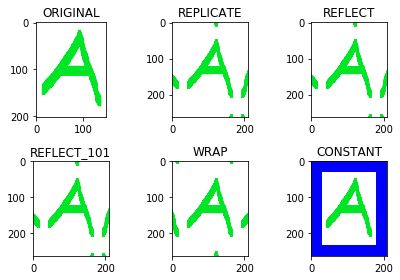

In [12]:
# 镜像
import cv2 as cv
import matplotlib.pyplot as plt

BLUE = [0, 0, 255]

image = cv.imread('C:\\Users\\Cap\\Pictures\\aaa.png')

replicate = cv.copyMakeBorder(image, 30, 30, 30, 30, cv.BORDER_REFLECT)
reflect = cv.copyMakeBorder(image, 30, 30, 30, 30, cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(image, 30, 30, 30, 30, cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(image, 30, 30, 30, 30, cv.BORDER_WRAP)
constant = cv.copyMakeBorder(image, 30, 30, 30, 30, cv.BORDER_CONSTANT, value=BLUE)

plt.subplot(231),plt.imshow(image,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.tight_layout()
plt.show()

## Arithmetic Operations on Images

In [98]:
cv.namedWindow?

In [103]:
mp.imshow?

In [49]:
cv.destroyAllWindows()